# Introduction to Calculus

## What is Calculus?

### Applications of calculus
The following are a few applications relevant to computing fields:
- Optimization (minimization of cost, backpropagation in neural networks, etc.)
- Modelling (differential equations)
- Signal transformation (Fourier, Laplace trandforms)
- Statistics (expectation values, Bayesian)
- and more!
$\newcommand{\ds}{\displaystyle}$

### The essence of calculus
Let me show you an example that demonstrates the calculus way of thinking:

How can we derive the formula for the area of a circle ($A = \pi r^2$)?
Suppose we slice the circle of radius $r$ shown below into $N$ sectors 
of equal area but they are connected  along the circumference. Then, we cut the top portion of the circumference and open up the circle. (Click the play button below.)

In [1]:
from numpy import pi, arange, sin, cos, concatenate, flip, array, sqrt, linspace
import matplotlib.pyplot as plt
import matplotlib.animation as animation

N = 24; 
def XY(s):
    r = 1/(1-s); dt = pi/N/r
    idx = arange(0, N+1); t = dt * idx
    def xf(t): return r * sin(t)
    def yf(t): return r * (1 - cos(t))
    x = xf(t); y = yf(t)
    for i in idx:
        if i%2 == 1:
            x[i] += -sin(t[i]); y[i] += cos(t[i])
    X = concatenate(( flip(-x), x, flip(xf(t)), -xf(t) ))
    Y = concatenate(( flip(y), y, flip(yf(t)), yf(t) ))
    return X, Y

def Arrow(x0,y0,x1,y1,hw=0.05,al=0.15): #hw: arrowhead width, al: arrowhead length
    v = array([x1-x0, y1-y0])
    pu = v/sqrt(sum(v**2)) # unit vector parallel to the arrow
    nu = array([ pu[1], -pu[0] ]) # unit vector normal to the arrow
    tip = array([x1, y1]) #Coordinates at the tip of the arrow
    hp = tip - al*pu + hw*nu; hm = tip - al*pu - hw*nu
    ax.plot( [x0, x1], [y0, y1], [hp[0], x1, hm[0]], [hp[1], y1, hm[1]], lw=0.5, color="k")

fig = plt.figure(figsize=(6.7,3.2))
ax = plt.axes( xlim =(-3.5, 3.2), ylim =(-0.6, 2.6), xticks=[], yticks=[] )
graph, = ax.plot([], [], lw = 0.5); plt.close(fig)

frames = 100
s = linspace(0,0.999, frames)
def animate(i):
    graph.set_data( XY(s[i]) )
    if i == frames-1:
        Arrow(-0.5,-0.2, -pi,-0.2); Arrow(0.5,-0.2, pi,-0.2); ax.text(-0.15, -0.25, '$2\pi r$')
        Arrow(-3.3,0.35, -3.3,0); Arrow(-3.3,0.65, -3.3,1.0); ax.text(-3.35, 0.45, '$r$')
    elif i == 0:
        ax.text(-2.7, 2.35, 'Opening up a circle of radius $r$ (circumference = $2\pi r$)')
    return graph
 
anim = animation.FuncAnimation(fig, animate,  frames = frames, interval = 30, blit = False)

from IPython.display import HTML
HTML(anim.to_jshtml(default_mode = 'once'))

What you get as a result are $N$ identical "triangles" of height $r$ and width $\varDelta s = 2\pi r/N$  (which is really arc length). 
Hence, the area of each of the thin "triangles" is approximately

$$
\varDelta A \approx \frac{1}{2}r\cdot \varDelta s = \frac{\pi r^2}{N}.
$$

It is an approximation because each "triangle" is really a sector of the circle (i.e., like a slice of pizza). 
However, as $N$ becomes large or equivalently $\varDelta s$ becomes small, the base of the "triangle" becomes more and more like a straight line and 
the above formula for the area gets more and more accurate.

Finally, the total area, i.e., the area of the circle is 

$$
A = N \cdot \varDelta A = \pi r^2
$$

Note that we get the exact result of $A = \pi r^2$ as we *send* $N$ to infinity or $\varDelta s$ to zero. 

Calculus formalizes this process of $N\to\infty$, or equivalently $\varDelta s\to 0$.
By considering infinities and/or *infinitesimals* (numbers smaller than any number you can think of!), calculations generally become very easy but, somewhat counter-intuitively, you get exact results! That is the essence of Calculus.

Before we get into the actual procedures of calculus, we will first review some pre-calculus topics in this chapter.



## Functions

Mathematical functions are practically the same things as functions in computer programming languages.
For example, $f(x) = x^2 + 2x +3$ can be expresed in Python as

In [2]:
def f(x):
    return x**2 + 2*x + 3

or, as a *lambda* function (a.k.a. anonymous function),

In [3]:
f = lambda x: x**2 + 2*x + 3

Note that $x$ in $f(x)$ is a *dummy variable* or a placeholder, which means that $x$ may be replaced by any quantity. For example,

\begin{align*}
f(2) &= 2^2+2\times 2 + 3 = 11\\
f(a+b) &= (a+b)^2 + 2(a+b) + 3
\end{align*}
or it is even possible to substitute $x+1$ in $x$:

$$
f(x+1) = (x+1)^2 + 2(x+1) +3 = x^2+4x+7.
$$

This function $f(x+1)$ is said to be a *composite function* because the argument of the function $f$ is another function $x+1$.  This is a particularly important concept in calculus as we will see shortly. 

```{note}
We will often omit $(x)$ and just use the function name like $f$, if it is clear what it means from the context. This is permitted since $(x)$ in $f(x)$ is only a reminder that $f$ is a function of $x$.
```

### Polynomial functions
A polynomial function has the form

$$
f(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots, ~~\text{where } a_0, a_1, a_2, \cdots \text{ are constants.}
$$

The degree of a polynomial is the highest power of $x$ in the function. For example, $3x^2+2x+1$ is a polynomial of degree 2, or a quadratic function, whereas $-2x^3+2x+1$ is a polynomial of degree 3, or a cubic function.

The following graphs show typical shapes of polynomials of degrees 1 through 4:

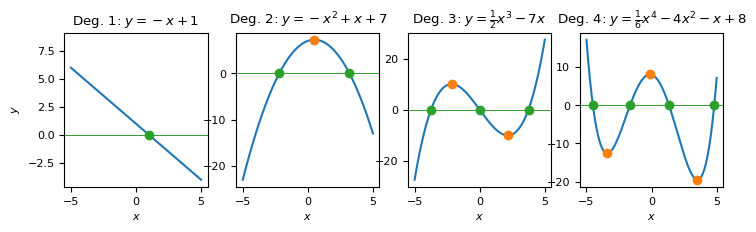

In [4]:
import matplotlib.pyplot as plt
import numpy as np

xmin=-5; xmax=5
x = np.linspace(xmin,xmax,300)
def polyplot(ax, f, title):
    ax.plot(x,f(x)); ax.set_title(title); ax.set_xlabel('$x$'); ax.set_xlim(1.1*xmin, 1.1*xmax)
    xint = []  # x-intercepts
    xstat = np.array([]) # stationary points (local min, max, etc.)
    for i in range(1,len(x)):
        if f(x[i])*f(x[i-1]) <= 0: xint.append(x[i])
    for i in range(1,len(x)-1):
        if (f(x[i+1])-f(x[i]))*(f(x[i])-f(x[i-1])) < 0: xstat = np.append(xstat, x[i])
    if len(xstat)==0: xstat=np.array([1.5*xmin])
    ax.plot(xstat, f(xstat), marker='o', linestyle = 'None')
    ax.plot([1.5*xmin]+list(xint)+[1.5*xmax], np.zeros(len(xint)+2), marker='o', lw=0.7)

plt.rcParams.update({'font.size': 8})
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8.5,2))
polyplot(ax1,lambda x: -x+1, "Deg. 1: $y = -x+1$"); ax1.set_ylabel('$y$')
polyplot(ax2,lambda x: -x**2+x+7, "Deg. 2: $y = -x^2+x+7$")
polyplot(ax3,lambda x: x**3/2- 7*x, r"Deg. 3: $y = \frac{1}{2}x^3-7x$")
polyplot(ax4,lambda x: x**4/6-4*x**2-x+8, r"Deg. 4: $y=\frac{1}{6}x^4-4x^2-x+8$")
plt.show()

Do you see some patterns? Here are some features I want you to see:
For a polynomial of degree $n$,
- there are **at most** $n$ points where the graph intersects with the $x$-axis (*$x$-intercepts*)
- there are **at most** $n-1$ peaks (*local* <i title='plural form of "maximum"'>maxima</i>) and/or troughs (*local* <i title='plural form of "minimum"'>minima</i>)
- for large $|x|$, or as you go outside of the region where the graph is going up and down, the function is approximately $y\approx a x^n$. Thus, all polynomials look like the plots below if zoomed out enough.

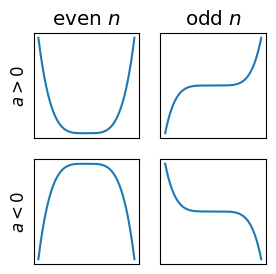

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplots(2, 2, figsize=(3,3))
y = np.array( [[x**4, -x**4],[x**5, -x**5]] )
for col in [0,1]:
    for row in [0,1]:
        if col==0: 
            if row==0: axs[row,col].set_ylabel('$a>0$')
            if row==1: axs[row,col].set_ylabel('$a<0$')
        if row==0:
            if col==0: axs[row,col].set_title('even $n$')
            if col==1: axs[row,col].set_title('odd $n$')
        axs[row,col].set_yticks([]); axs[row,col].set_xticks([])
        axs[row,col].plot(x, y[col,row])
plt.show()

#### Examples/Exercises 
1. Without plotting the graph, guess how many peaks and troughs $\displaystyle y = \frac{x^{5}}{5}-\frac{5}{3}x^{3}+4x+2$ has. Also, consider what happens to $y$ as $|x|$ becomes large.

```{admonition} Answer
:class: dropdown
There are two peaks and two troughs. The function exhibits positive slopes for large $|x|$, meaning that $y$ increases as $x$ increases when $x$ is sufficiently far from the origin. To confirm these characteristics, plot the graph using a computer.
```   
2. What will happen if you flip the sign of the highest-power term, i.e.,  $\displaystyle y = -\frac{x^{5}}{5}-\frac{5}{3}x^{3}+4x+2$? 

```{admonition} Answer
:class: dropdown
 It has positive slopes for large $|x|$.  Note that this one looks like a degree 3 polynomial, i.e., 
 it has only 1 peak and 1 trough.
```


### Trigonometric functions

The sine and the cosine functions are the basic functions that you can build all other trigonometric functions from:

$$
\tan\theta = \frac{\sin\theta}{\cos\theta},~~ \sec\theta = \frac{1}{\cos\theta},~~
\csc\theta = \frac{1}{\sin\theta},~~ \cot\theta = \frac{1}{\tan\theta}.
$$

In calculus, in fact mathematics in general, we almost always use radians for the arguments, i.e., $\theta$ here. The argument of a trigonometric function is called *angle* or *phase* depending on the application.

Here are the plots of $\sin\theta$ and $\cos\theta$:

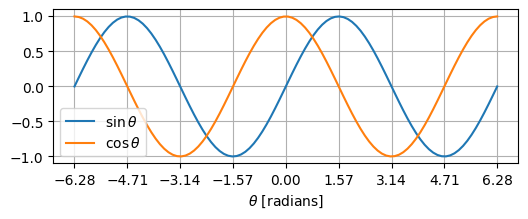

In [6]:
import matplotlib.pyplot as plt
from numpy import linspace, pi, sin, cos
x = np.linspace(-2*pi, 2*pi, 100)
plt.rcParams.update({'font.size': 10}); plt.figure(figsize=(6,2))
plt.plot(x, sin(x), label=r"$\sin\theta$")
plt.plot(x, cos(x), label=r"$\cos\theta$")
plt.xlabel(r"$\theta$ [radians]"); plt.xticks([-2*pi,-3*pi/2,-pi,-pi/2,0,pi/2,pi,3*pi/2,2*pi])
plt.legend(); plt.grid(); plt.show()

Note that both $\sin\theta$ and $\cos\theta$ repeat 
the same pattern every $2\pi=6.283\cdots$ radians. We say $\sin\theta$ and $\cos\theta$ have a *period* of $2\pi$.  Also, note that
$\sin(0) = 0$ and increases as $\theta$ increases.  
Whereas $\cos(0) = 1$ and decreases as $\theta$ increases.    

#### Sinusoidal oscillations
The sine and cosine functions (collectively called the *sinusoidal* function) are often used to model oscillating phenomena or waves. 

In [7]:
from numpy import sqrt, pi, cos, arctan
from myst_nb import glue
m = 1.0; k = 9.0; y0 = 0.2; v0 = 0.5
ω = sqrt(k/m); A = sqrt(y0**2 + (v0/ω)**2); ϕ = arctan(-v0/ω/y0)
v0abs = abs(v0)
A = round(A, 3); ω = round(ω, 3); ϕ = round(ϕ, 3)
glue("m", m); glue("k", k); glue("y0", y0); glue("v0abs", v0abs); 
glue("A", A); glue("omega", ω); glue("phi", ϕ)

1.0

9.0

0.2

0.5

0.26

3.0

-0.695

Consider a {glue:}`m`-kg weight hung on a spring of spring constant {glue:}`k` N/m. 
If you stretch it by {glue:}`y0` m and give it a upward velocity of {glue:}`v0abs` m/s, the $y$-coordinate will change in time as

$$
y(t) = A\cos(\omega t + \phi)
$$
where $A= $ {glue:}`A` m, $\omega = $ {glue:}`omega` radians/sec, and $\phi = $ {glue:}`phi` radians.
$A$ is called *the amplitude*, $\omega$ is *the angular frequency*, and $\phi$ is *the phase constant*.

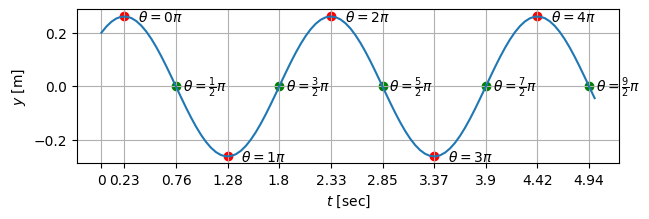

In [8]:
import matplotlib.pyplot as plt
from numpy import linspace, sqrt, pi, cos, arctan, arange, concatenate, round

m = 1.0; k = 9.0; y0 = 0.2; v0 = 0.5
ω = sqrt(k/m); A = sqrt(y0**2 + (v0/ω)**2); ϕ = arctan(-v0/ω/y0)

t = linspace(0,5, 100)
plt.figure(figsize=(7,2))
plt.plot(t, A*cos(ω*t + ϕ) )

ts = ( pi*arange(5) - ϕ ) / ω; 
ys = A*cos(ω*ts + ϕ)
plt.scatter(ts, ys, color="red" )
for n in range(5): plt.text(ts[n]+0.14,ys[n]-0.02,r"$\theta="+str(n)+"\pi$")
    
tz = ( pi*(arange(5)+0.5) - ϕ ) / ω; 
yz =  A*cos(ω*tz + ϕ)
plt.scatter(tz, yz, color="green" )
for n in range(5): plt.text(tz[n]+0.07,yz[n]-0.02,r"$\theta=\frac{"+str(2*n+1)+"}{2}\pi$")

tticks = [0] + list(round(concatenate((ts, tz)), 2))
plt.xticks(tticks, tticks);
plt.ylabel("$y$ [m]"); plt.xlabel("$t$ [sec]"); plt.grid(); plt.show()

The red dots are where $\theta = \omega t + \phi = n\pi$. For example, the  *phase* $\theta = \pi$ in the graph of $\cos\theta$ corresponds to $t$ such that

$$
\omega t + \phi = \pi  ~~\therefore ~ t = \frac{\pi-\phi}{\omega} = 1.28\,\text{sec}.
$$

Since the period is the time between phases 0 and $2\pi$, it is $2.33-0.23 = 2.1$ seconds.

##### Examples/Exercises
Find the earliest time after $t=0$ when the following function reaches zero. Note that the sine function is zero at phases $\theta = 0, \pi, 2\pi, \cdots$.

$$
y = 3\sin(5t-1)
$$

```{admonition} Answer
:class: dropdown
$t = 0.828$
```

#### Important trigonometric identities
- $\cos^2\theta + \sin^2\theta = 1$ (a.k.a. Pythagorean theorem)
- $\sin(\alpha + \beta) = \sin\alpha\cos\beta + \cos\alpha\sin\beta$ &emsp; ( Corollary: $\sin(2\theta) = 2\sin\theta\cos\theta$ )
- $\cos(\alpha + \beta) = \cos\alpha\cos\beta - \sin\alpha\sin\beta$ &emsp; ( Corollary: $\cos(2\theta) = \cos^2\theta - \sin^2\theta$ )

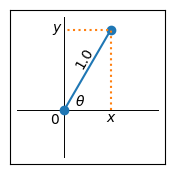

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,2))
plt.plot([-0.5, 1.0],[0,0], [0,0], [-0.5, 1.0], color="k", lw=0.7)
plt.xticks([]); plt.yticks([])
x0 = 0.5; y0 = np.sqrt(3)/2
plt.plot([0, x0], [0, y0], marker='o')
plt.plot([x0,x0,0], [0,y0,y0], linestyle="dotted")
plt.text(x0-0.05,-0.13, "$x$"); plt.text(-0.13,y0-0.03, "$y$"); 
plt.text(-0.15,-0.15, "0"); plt.text(0.12,0.05, r"$\theta$"); plt.text(0.1,0.45, "1.0", rotation = 60); 
plt.savefig('trig_pythagorean.png')

```{tip}
**Proof of $\cos^2\theta + \sin^2\theta = 1$**

Consider a line segment of length 1 emanating from the origin and forming an angle $\theta$ with the positive side of the $x$-axis as shown in the figure below. The definitions of the sine and cosine functions give
\begin{align*}
\cos\theta = \frac{\text{Adjacent}}{\text{Hypotenus}} = \frac{x}{1} = x\\
\sin\theta = \frac{\text{Opposite}}{\text{Hypotenus}} = \frac{y}{1} = y.
\end{align*}
Pythagorean theorem states that $x^2+y^2 = 1^2$, hence,
$\cos^2\theta + \sin^2\theta = 1.$

 ![](./trig_pythagorean.png) 

```

##### Examples/Exercises
1. Find the range of $\theta$ such that the identity $\sin\theta = \sqrt{1-\cos^2\theta}$ is valid.
```{admonition} Answer
:class: dropdown
$0\le \theta \le \pi$
```
2. Derive the identity $\tan^2\theta + 1 = \sec^2\theta$ using the identities above.
```{admonition} Answer
:class: dropdown
Divide the first identity (Pythagorean) by $\cos^2\theta$.
```
3. Derive the angle sum formula and the double angle formula for $\tan\theta$:
 
   $$
   \tan(\alpha+\beta)=\frac{\tan\alpha+\tan\beta}{1-\tan\alpha\tan\beta},~~~
   \tan(2\theta) =\frac{2\tan\theta}{1-\tan^2\theta}
   $$
   
```{admonition} Answer
:class: dropdown
Use $\tan\theta = \frac{\sin\theta}{\cos\theta}$ and the angle sum formulas for $\sin\theta$ and $\cos\theta$.
```

### Exponential and logarithmic functions
#### The relationship between exponential and logarithmic functions
The following two equations express the same relationship between $x$ and $y$:

$$
y = b^x  ~~\Leftrightarrow~~ x = \log_b y,
$$(exp_log)

where $b$ is the base ($b>0$) and $x$ is the exponent. For example, suppose you want to express a number, say, 123 as a power of 2, that is, we want to find $x$ in $123 = 2^x$. We can find $x$ simply by rewriting the equation in the logarithmic form

$$
x = \log_2 123 = \frac{\ln 123}{\ln 2} = 6.943,
$$

where $\ln$ is the natural logarithm and the change-of-base formula $\ds\log_a x = \frac{\log_b  x}{\log_b a}$ is used.

#### Laws of exponents and logarithm
The following rules can be easily derived from the fact $b^n = b\cdot b\cdot b\cdot b\cdots b$ and Eqs {eq}`exp_log`.
|  | Exponent  | Logarithm       |
|:-|-----------|----------------:|
|1| $b^0 = 1$  |  $\log_b 1 = 0$ |
|2| $b^1 = b$  |  $\log_b b = 1$ |
|3| $\ds b^{-1} = \frac{1}{b}$ |  $\ds\log_b \left(\frac{1}{b}\right) = -1$ |
|4| $b^m b^n = b^{m+n}$    |  $\log_b(XY) = \log_bX + \log_bY$ |
|5| $\ds\frac{b^m}{b^n} = b^{m-n}$ | $\ds\log_b\left(\frac{X}{Y}\right)=\log_bX-\log_bY$ |
|6| $(b^m)^n = b^{mn}$    |  $\log_b(X^n) = n\log_bX$ |

The logarithmic identities 4-6 can be derived from the exponential counterparts by setting 
$X = b^m$ and $Y = b^n$ and taking the logarithm of the equation.  One more thing you should recall is 

$$
\sqrt[n]{x} = x^{1/n},
$$

which is an important identity often used in calculus.

#### Examples/Exercises 

1. Express $2^{64}$ as a power of 10.
```{admonition} Answer
:class: dropdown
$10^{19.265919722494793}$
```
2. Plot $y=e^x$ and $y=\ln x$ for $x>0$, and observe that the two plots are mirror images of each other.
Also, recall that the exponential function grows "faster" than any polynomial and the logarithmic function grows "slower" than any polynomial as $x\to \infty$. Below is a sample code:

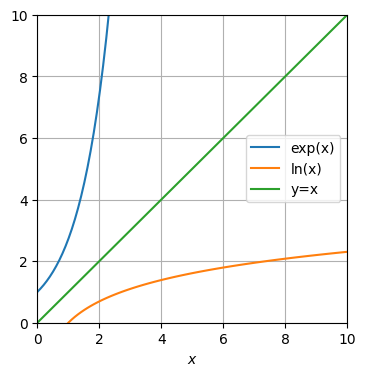

In [10]:
import matplotlib.pyplot as plt
from numpy import linspace, exp, log
max = 10 #make this number larger and observe how the functions behave.
x = linspace(0.001, max, 100) #Why do we have min(x) = 0.001?
plt.figure(figsize=(4,4)); plt.xlim([0,max]); plt.ylim([0,max])
plt.plot(x, exp(x), label="exp(x)")
plt.plot(x, log(x), label="ln(x)")
plt.plot(x, x, label="y=x")
plt.legend(); plt.grid(); plt.xlabel('$x$');
plt.show()

## Limits
### Limits where $x\to$constant
Consider the following function

$$
y(x) = \frac{\sin x}{x}.
$$

What is the value of $y$ for $x=0$? 

$$
y(0) = \frac{\sin 0}{0} = \frac{0}{0}=\text{undefined?!?!}
$$

But if you plot it, you get

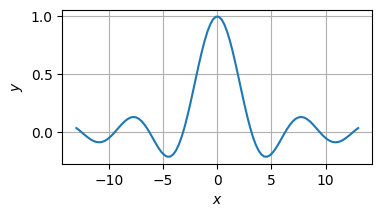

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-13,13,100)
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(4,2)); plt.grid(); plt.xlabel('$x$'); plt.ylabel('$y$')
plt.plot(x, np.sin(x)/x)
plt.show()

As you can see, $y(0) = 1.0$. What is going on here?  It is true that $0/0$ is undefined, but 
you could start with some finite value of $x$ then make it smaller and smaller and see what happens to $y(x)$.  This process is called the *limit*:

$$
\lim_{x\to 0} y(x) = \lim_{x\to 0} \frac{\sin x}{x} = 1.
$$

This means that $\frac{\sin x}{x}$ is not defined at $x=0$, but it approaches 1 as $x$ approaches 0 as shown below.

In [12]:
from numpy import sin, linspace
[print("y(%1.3f) = %1.7f" %(x, sin(x)/x) ) for x in linspace(1, 0.001, 20)];

y(1.000) = 0.8414710
y(0.947) = 0.8569713
y(0.895) = 0.8717854
y(0.842) = 0.8858891
y(0.790) = 0.8992594
y(0.737) = 0.9118744
y(0.685) = 0.9237134
y(0.632) = 0.9347569
y(0.579) = 0.9449868
y(0.527) = 0.9543863
y(0.474) = 0.9629399
y(0.422) = 0.9706334
y(0.369) = 0.9774541
y(0.316) = 0.9833908
y(0.264) = 0.9884336
y(0.211) = 0.9925742
y(0.159) = 0.9958057
y(0.106) = 0.9981228
y(0.054) = 0.9995216
y(0.001) = 0.9999998


Sometimes limits do not exist.  Here is an example:

$$
H(x) = \begin{cases}
1 & \text{for } x\ge 0\\
0 & \text{for } x<0
\end{cases}
$$

This is called the *step function*. Ideal digital signals can be constructed by shifting and adding step functions as shown below. 

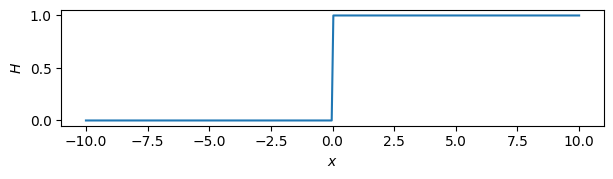

In [13]:
import numpy as np
H = np.vectorize(lambda x: 1 if x>=0 else 0)
x = np.linspace(-10,10,300)
plt.figure(figsize=(7,1.5))
plt.plot(x, H(x)) #Try something like H(x+7.5) - H(x-2.5) + H(x-5)
plt.xlabel('$x$'); plt.ylabel('$H$'); plt.show()

If you approach $x=0$ from the right ($x>0$), the limit is

$$
\lim_{x\to 0+}H(x) = 1.
$$

On the other hand, if you approach from the left ($x<0$),

$$
\lim_{x\to 0-}H(x) = 0.
$$

In this case, the limits exist if we approach from either the left or the right, but we say
$\lim_{x\to 0}H(x)$ does not exist.

#### Examples/Exercises 
Limits of polynomials can be fairly easily computed. Here are some examples.

1. Compute $\displaystyle \lim_{x\to 1}\frac{x^2 - 1}{x-1}$.  Note that we cannot just substitute $x=1$ since we would get $0/0=$ undefined. Let's do this in two different ways:

   **a.** Factor the numerator and simplify the expression. You will see that it is now possible to substitute $x=1$.
   
   **b.** Let $\epsilon = x-1$, hence $x = \epsilon + 1$.  Note $x\to 1$ implies $\epsilon\to 0$. Substituting this in the expression and simplifying it, now you can let $\epsilon = 0$ to get the result. 

```{admonition} Answer
:class: dropdown
$\displaystyle \lim_{x\to 1}\frac{x^2 - 1}{x-1} = 2$
```

2. Compute $\displaystyle \lim_{x\to -3/2}\frac{2x^2+x-3}{2x^2+3x}$ using either of the methods described above.

```{admonition} Answer
:class: dropdown
$\displaystyle \lim_{x\to -3/2}\frac{2x^2+x-3}{2x^2+3x} = \frac{5}{3}$
```

### Limits where $x\to\pm\infty$

Consider the following example:

$$
\lim_{x\to\infty}\frac{3x^3+2x^2+x-1}{x^3+2x^2+3x+4}
$$

Of course, we cannot substitute $x=\infty$ because we would just get $\frac{\infty}{\infty}$, which is undefined. One thing we can do is to factor out the highest power term in the numerator and in the denominator:

$$
\lim_{x\to\infty}\frac{3x^3+2x^2+x-1}{x^3+2x^2+3x+4}
= \lim_{x\to\infty}\frac{3x^3(1+\frac{2}{3x}+\frac{1}{3x^2}-\frac{1}{3x^3})}{x^3(1+\frac{2}{x}+\frac{3}{x^2}+\frac{4}{x^3})}
= \lim_{x\to\infty}\frac{3x^3}{x^3}
= 3
$$

because $\ds\frac{1}{x^n}\to 0$ ($n>0$) as $x\to\infty$. The lesson we can learn here is that the *asymptotic behaviour* of a polynomial of degree $n$ is dominated by the highest per term:

$$
a_n x^n + a_{n-1}x^{n-1}+\cdots +a_2 x^2 + a_1 x+ a_0 \sim a_n x^n
$$


#### Examples/Exercises
Suppose that the computation time $T$ of a certain code increases as a function of the input size $k$ as

$$
T = 8 k^7 - 2k^5 + k^3 + 2.
$$

With the input of unknown size, you measured $T = 1.4\times 10^9$.  Estimate the size of the input.
```{admonition} Answer
:class: dropdown
$k \approx 15$.  This is justified because $\ds\frac{\text{Most dominant term}}{\text{Second most dominant term}}=\frac{2k^5}{8k^7}\approx 0.001$
```